In [1]:
# The libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("1.04.+Real-life+example.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
len(data["Model"].unique())

312

In [4]:
data.shape

(4345, 9)

In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Clean the data

In [6]:
# Deal with the missing variables
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
#To calculate the percentage of the missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
data.shape
total_variables = 4345*9
mv = 172+150
mv_percentage = (mv/total_variables)*100
mv_percentage

0.823424114563355

Only price and EngineV have missing values, since the percentage is less than 5%, i would drop the rows.

In [9]:
data_no_mv = data.dropna(axis=0)

In [10]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Exploring the PDFs

In [11]:
# Get the numerical data
list(data_no_mv._get_numeric_data().columns)

['Price', 'Mileage', 'EngineV', 'Year']

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

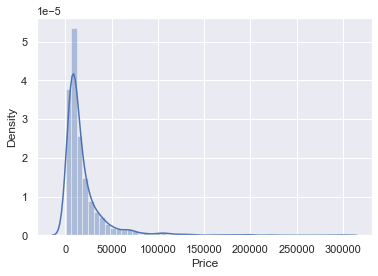

In [12]:
# Remove Outliers
sns.distplot(data_no_mv['Price'])

We can see that majority of the outliers are skewed towards the right (the 99th  percentile), so i would removed them in other to improve accuracy in the model.

In [13]:
# To remove the 99th percentile
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

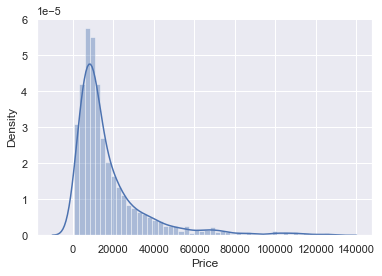

In [14]:
sns.distplot(data_1['Price'])

Now Price, has less outliers

#### Mileage

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

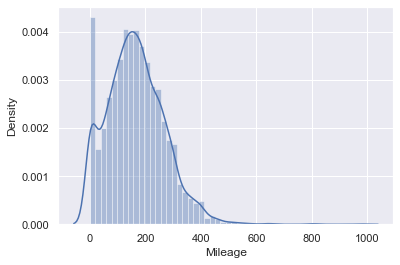

In [15]:
sns.distplot(data_1['Mileage'])

In [16]:
# To remove the 99th percentile
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

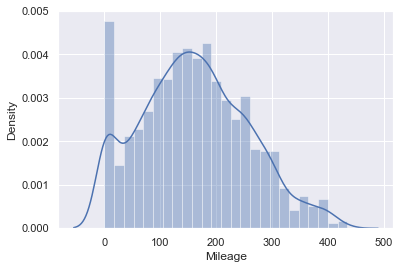

In [17]:
sns.distplot(data_2['Mileage'])

#### EngineV

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

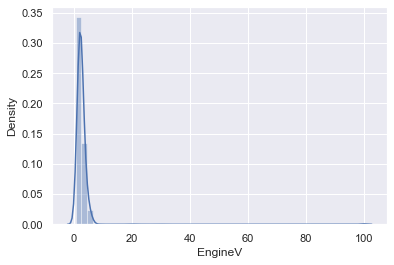

In [18]:
sns.distplot(data_2['EngineV'])

In [19]:
# To remove the 99th percentile
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV']<q]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3894.000000,3894.000000,3894.000000,3894.000000
mean,17823.805845,161.598100,2.417681,2006.397021
std,18919.010466,96.176488,0.896970,6.611338
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2012.000000
max,129222.000000,435.000000,5.700000,2016.000000


C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

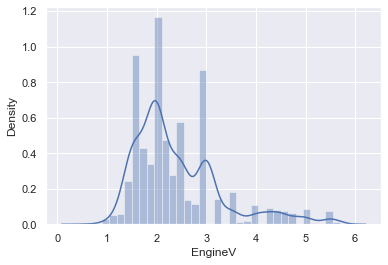

In [20]:
sns.distplot(data_3['EngineV'])

#### Year

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

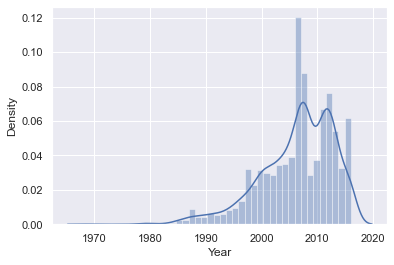

In [21]:
sns.distplot(data_3['Year'])

Please not, this column is rightly skewed so we remove the 10th percentile

In [22]:
# To remove the 10th percentile
q = data_3['Year'].quantile(0.1)
data_4 = data_3[data_3['Year']>q]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3433.000000,3433.000000,3433.000000,3433.000000
mean,19622.669345,148.217303,2.435963,2008.148849
std,19425.538866,86.800994,0.920217,4.585656
min,1200.000000,0.000000,0.600000,1999.000000
25%,8400.000000,86.000000,1.800000,2005.000000
50%,12800.000000,148.000000,2.200000,2008.000000
75%,23200.000000,206.000000,3.000000,2012.000000
max,129222.000000,427.000000,5.700000,2016.000000


C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

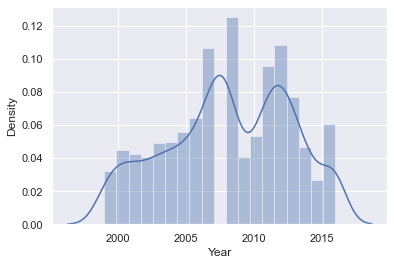

In [23]:
sns.distplot(data_4['Year'])

In [24]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6


We have successfully cleaned our data, and reset the index, now let us observe it.

In [25]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3433,3433.000000,3433,3433.000000,3433.000000,3433,3433,3433.000000,3433
unique,7,NaN,6,NaN,NaN,4,2,NaN,258
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,Vito
freq,762,NaN,1192,NaN,NaN,1697,3144,NaN,149
mean,NaN,19622.669345,NaN,148.217303,2.435963,NaN,NaN,2008.148849,NaN
std,NaN,19425.538866,NaN,86.800994,0.920217,NaN,NaN,4.585656,NaN
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000,NaN
25%,NaN,8400.000000,NaN,86.000000,1.800000,NaN,NaN,2005.000000,NaN
50%,NaN,12800.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,23200.000000,NaN,206.000000,3.000000,NaN,NaN,2012.000000,NaN


### Check the OLS assumptions

<p>OLS Assumption 1: The linear regression model is “linear in parameters.”
<br />OLS Assumption 2: There is a random sampling of observations.
<br />OLS Assumption 3: The conditional mean should be zero.
<br />OLS Assumption 4: There is no multi-collinearity (or perfect collinearity).</p>

Text(0, 0.5, 'price')

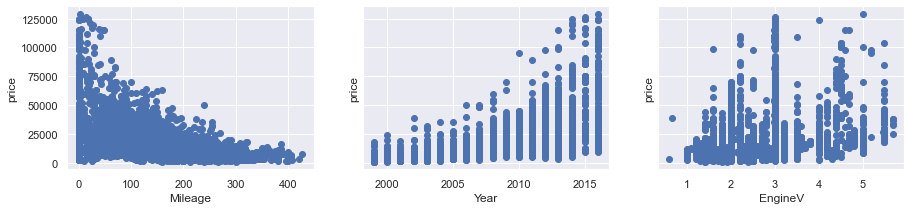

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_xlabel('Mileage')
ax1.set_ylabel('price')

ax2.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax2.set_xlabel('Year')
ax2.set_ylabel('price')

ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_xlabel('EngineV')
ax3.set_ylabel('price')

<p>We can see that there is a regression pattern, especially in Mileage and Year, but they are not linear,
<br />This is because Price is not normally distributed,
<br />So its relationship with the other normally distributed feature, is not linear.
</p>

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

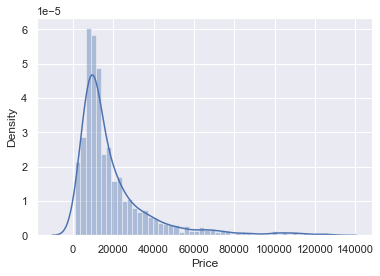

In [27]:
sns.distplot(data_cleaned['Price'])

To fix this problem, we use log.

In [28]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()
data_cleaned.describe()

,Price,Mileage,EngineV,Year,log_price
count,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000
mean,19622.669345,148.217303,2.435963,2008.148849,9.541272
std,19425.538866,86.800994,0.920217,4.585656,0.808277
min,1200.000000,0.000000,0.600000,1999.000000,7.090077
25%,8400.000000,86.000000,1.800000,2005.000000,9.035987
50%,12800.000000,148.000000,2.200000,2008.000000,9.457200
75%,23200.000000,206.000000,3.000000,2012.000000,10.051908
max,129222.000000,427.000000,5.700000,2016.000000,11.769287


C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

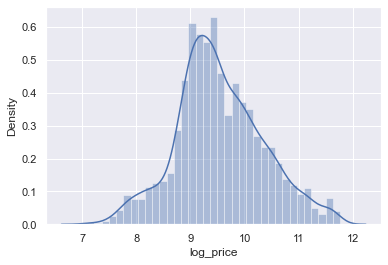

In [29]:
sns.distplot(data_cleaned['log_price'])

The log price, is normally distributed.

Text(0, 0.5, 'log price')

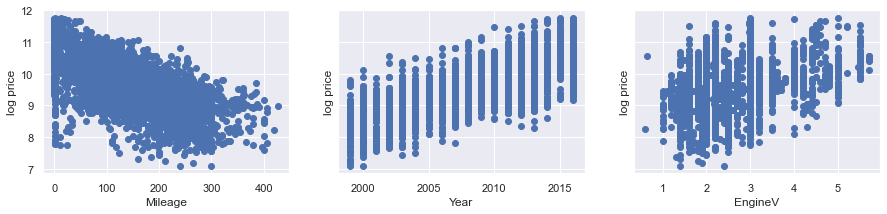

In [30]:
# Checking for linearity
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax1.set_xlabel('Mileage')
ax1.set_ylabel('log price')

ax2.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax2.set_xlabel('Year')
ax2.set_ylabel('log price')

ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_xlabel('EngineV')
ax3.set_ylabel('log price')

OLS assumption 1 and 2 is satisfied, now check for multicollinearity.

#### Check for Multicollinearity

In [31]:
data_cleaned.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'],
      dtype='object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [33]:
vif

,VIF,features
0,3.898858,Mileage
1,10.583357,Year
2,8.010969,EngineV


<p>Note: VIF of 1-5 by convention are perfectly okay.
    <br />some people say 6 or 10.
<br />I would remove year, because its VIF is very far away from the othe variables.
</p>

In [34]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)
# Also i would drop price, because i dont need it
data_no_multicollinearity = data_cleaned.drop(['Price'], axis=1)
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,2006,A6,9.560997


#### Dealing with dummy variables

In [35]:
# To get categorical data and convert them to dummie
# drop first(the first category) is equal to true, because if we have n categories, then we have n-1 dummies, because the last one can be determined by the others.
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z4
0,427,2.9,1999,8.974618,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,358,5.0,2003,9.495519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,240,4.2,2007,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120,2.0,2011,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,200,2.7,2006,9.560997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
len(data_with_dummies)

3433

#### Rearange to make Y the first column

In [37]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_116', 'Model_118', 'Model_120', 'Model_200', 'Model_210',
       'Model_220', 'Model_316', 'Model_318', 'Model_320', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_525',
       'Model_528', 'Model_530', 'Model_535', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Mod

In [38]:
cols = ['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_116', 'Model_118', 'Model_120', 'Model_200', 'Model_210',
       'Model_220', 'Model_316', 'Model_318', 'Model_320', 'Model_325',
       'Model_328', 'Model_330', 'Model_335', 'Model_4 Series Gran Coupe',
       'Model_428', 'Model_4Runner', 'Model_5 Series',
       'Model_5 Series GT', 'Model_520', 'Model_523', 'Model_525',
       'Model_528', 'Model_530', 'Model_535', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CLA 200', 'Model_CLA 220', 'Model_CLA-Class',
       'Model_CLC 180', 'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220',
       'Model_CLK 230', 'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320',
       'Model_CLK 430', 'Model_CLS 350', 'Model_CLS 400', 'Model_CLS 500',
       'Model_CLS 63 AMG', 'Model_Caddy', 'Model_Camry', 'Model_Captur',
       'Model_Caravelle', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf IV', 'Model_Golf Plus', 'Model_Golf V',
       'Model_Golf VI', 'Model_Golf VII', 'Model_Golf Variant',
       'Model_Grand Scenic', 'Model_Grandis', 'Model_Hiace',
       'Model_Highlander', 'Model_Hilux', 'Model_I3', 'Model_IQ',
       'Model_Jetta', 'Model_Kangoo', 'Model_Koleos', 'Model_L 200',
       'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser Prado',
       'Model_Latitude', 'Model_Logan', 'Model_Lupo', 'Model_M5',
       'Model_M6', 'Model_ML 250', 'Model_ML 270', 'Model_ML 280',
       'Model_ML 320', 'Model_ML 350', 'Model_ML 400', 'Model_ML 430',
       'Model_ML 500', 'Model_ML 550', 'Model_ML 63 AMG', 'Model_Master',
       'Model_Matrix', 'Model_Megane', 'Model_Modus', 'Model_Multivan',
       'Model_New Beetle', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Pinin', 'Model_Pajero Sport',
       'Model_Pajero Wagon', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 250', 'Model_S 320',
       'Model_S 350', 'Model_S 400', 'Model_S 430', 'Model_S 500',
       'Model_S 550', 'Model_S4', 'Model_S5', 'Model_S8',
       'Model_SL 500 (550)', 'Model_SL 55 AMG', 'Model_SLK 200',
       'Model_SLK 350', 'Model_Sandero', 'Model_Sandero StepWay',
       'Model_Scenic', 'Model_Scion', 'Model_Scirocco', 'Model_Sequoia',
       'Model_Sharan', 'Model_Sienna', 'Model_Smart', 'Model_Space Star',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_V 250', 'Model_Vaneo',
       'Model_Venza', 'Model_Viano', 'Model_Virage', 'Model_Vista',
       'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5', 'Model_X5 M',
       'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z4']

In [39]:
data_preprocessed = data_with_dummies[cols]

In [40]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z4
0,8.974618,427,2.9,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.495519,358,5.0,2003,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.043249,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.814656,120,2.0,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.560997,200,2.7,2006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Random Forest Model

In [41]:
y = data_preprocessed['log_price']
X = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [43]:
inputs_scaled = scaler.transform(X)
inputs_scaled

array([[ 3.21221333,  0.5043426 , -1.99539198, ..., -0.02957424,
        -0.06399035, -0.03819131],
       [ 2.41717575,  2.78674423, -1.12297977, ..., -0.02957424,
        -0.06399035, -0.03819131],
       [ 1.05754628,  1.91725789, -0.25056756, ..., -0.02957424,
        -0.06399035, -0.03819131],
       ...,
       [-1.60410126,  0.61302839,  1.27615381, ..., -0.02957424,
        -0.06399035, -0.03819131],
       [-1.69627952,  1.15645735, -1.99539198, ..., -0.02957424,
        -0.06399035, -0.03819131],
       [-0.27903863, -0.47382953,  1.05805076, ..., -0.02957424,
        -0.06399035, -0.03819131]])

Note: It is not common to standardize dummy variables in Machine learning.

#### Split, train and test

In [44]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)

In [45]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
y_hat = forest_model.predict(train_X)



# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=40)

#### Compare the Predictions and Targets

In [46]:

df_pf1 = pd.DataFrame(np.exp(y_hat), columns=['Prediction'])
df_pf1['Targets'] = np.exp(train_y.reset_index(drop=True))
np.isinf(df_pf1).sum()

Prediction    0
Targets       0
dtype: int64

In [47]:
df_pf1.reset_index(drop=True)

,Prediction,Targets
0,15137.874986,15300.0
1,8054.977544,7500.0
2,49683.370480,52777.0
3,4115.451277,4200.0
4,17702.486224,17777.0
...,...,...
2741,84419.028237,75000.0
2742,50922.071541,63200.0
2743,8713.157371,8200.0
2744,32203.815141,34500.0


### Validation

<p>We validate to see the relationship between the train_y and the y_hat variables,
<br />The train_y variables are our target variables, while the y_hat variables are our predicted variables.</p>

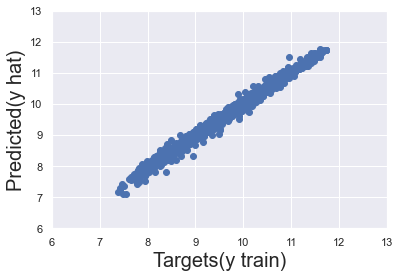

In [48]:
plt.scatter(y_hat, train_y)
plt.xlabel("Targets(y train)", fontsize=20)
plt.ylabel("Predicted(y hat)", fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

This model has passed the first validation, as the targets and predicted values are precise

#### Second Check (The Residual Plot PDF)
This is the difference between the target and the predicted values (The Error)

C:\Users\Ovbude\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


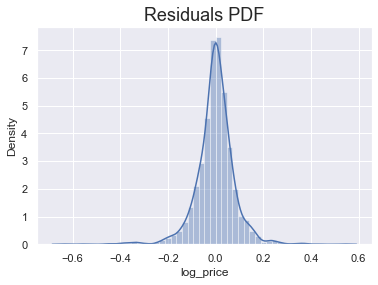

In [49]:
sns.distplot(train_y-y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

<p>We can see that the errors are normally distributed, there is a zero mean.
<br />It therefore satisfies the "normality and homoscedasticity" requirement.
<br />Although there is a much longer tail on the negative side, which means there are some other observations, in which (y_hat - y_train) is much lower than the mean, which means those predictors underestimate the target.
<br />While the estimators on the right side, rarely overestimate the target.
</p>

#### R squared of the model

In [50]:
forest_model.score(X,y)

0.9775151922555767

This is a 97% r squared, which seems like overfitting, but is a good score.

### Testing

In [51]:
# Here we introduce new datasets(x_test)
y_hat_test = forest_model.predict(val_X)

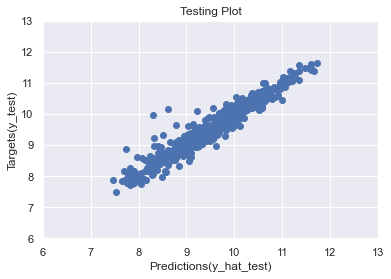

In [52]:
# Now we plot the predictions(y_hat_test), against the targets(y_test)
plt.scatter(val_y, y_hat_test)
plt.xlabel("Predictions(y_hat_test)")
plt.ylabel("Targets(y_test)")
plt.title("Testing Plot")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

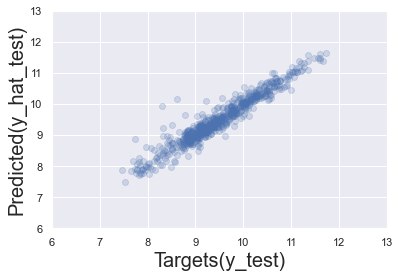

In [53]:
plt.scatter(val_y, y_hat_test, alpha=0.2)
plt.xlabel("Targets(y_test)", fontsize=20)
plt.ylabel("Predicted(y_hat_test)", fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<p>The more saturated the colour, the higher the concentration of points.
    <br />This shows majority of the points, are close to the 45 degree line.
    <br />This is a really good regression.
    </p>

In [54]:
# dataframe performance
# Note we turn the prices back to its normal form, which is opposite of log
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7792.104018
1,62635.596786
2,43559.453952
3,7686.332484
4,10783.285243


In [55]:
df_pf = df_pf.replace([np.inf, -np.inf], np.nan)
np.isinf(df_pf).sum()

Prediction    0
dtype: int64

In [56]:
df_pf['Targets'] = np.exp(val_y.reset_index(drop=True))
df_pf

,Prediction,Targets
0,7792.104018,7900.00
1,62635.596786,67500.00
2,43559.453952,41000.00
3,7686.332484,7800.00
4,10783.285243,8650.00
...,...,...
682,9889.693938,9100.00
683,11690.629574,9658.94
684,4928.240495,8500.00
685,9101.109423,10400.00


In [57]:
df_pf.describe()

,Prediction,Targets
count,687.000000,687.000000
mean,18188.053139,18182.763217
std,16785.104300,17392.698437
min,1816.094478,1750.000000
25%,8112.112974,7849.500000
50%,11851.930463,11900.000000
75%,23102.644042,22700.000000
max,113822.749590,124000.000000


In [58]:
df_pf.isnull().sum()
# inf stands for (infinity) which the value is too large to be displayed.

Prediction    0
Targets       0
dtype: int64

In [59]:
# Now lets compare them
df_pf['Residual'] = df_pf['Targets'] - df_pf['Prediction']
df_pf['%Difference'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf.head()

,Prediction,Targets,Residual,%Difference
0,7792.104018,7900.0,107.895982,1.365772
1,62635.596786,67500.0,4864.403214,7.206523
2,43559.453952,41000.0,-2559.453952,6.242571
3,7686.332484,7800.0,113.667516,1.457276
4,10783.285243,8650.0,-2133.285243,24.662257


In [60]:
np.isinf(df_pf).sum()

Prediction     0
Targets        0
Residual       0
%Difference    0
dtype: int64

In [61]:
# To get the number of Predictions, whose values is equal to 0
no_predictions = np.where(df_pf['Prediction'] == 0)
len(no_predictions[0])

0

In [62]:
# pd.options.display.max_rows = 20
# pd.reset_option
df_pf['%Difference'].mean()

16.234777484843743

In [63]:
# To change floats to 2 digits after the dot
pd.set_option('display.float_format', lambda x: '%.2f' %x)
# To sort values by difference
df_pf.sort_values(by=['%Difference']).head(15)
df_pf['%Difference'].max()
# To find INfinite variables
np.isinf(df_pf).sum()

Prediction     0
Targets        0
Residual       0
%Difference    0
dtype: int64

In [64]:
# To get the mean percentage difference
df_pf['%Difference'].mean()

16.234777484843743

## Model Optimization - Hyper parameter tuning with RandomizedSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [67]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=100, n_estimators=800, random_state=1)

In [68]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [69]:
#Calculating the accuracy of the base model
base_accuracy = evaluate(forest_model, val_X, val_y)
print(f"R square: {forest_model.score(X,y)}")

Model Performance
Average Error: 0.1474 degrees.
Accuracy = 98.41%.
R square: 0.9775151922555767


In [70]:
#Calculating the accuracy of the optimized model
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, val_X, val_y)
print(f"R square: {best_random.score(X,y)}")

Model Performance
Average Error: 0.1470 degrees.
Accuracy = 98.41%.
R square: 0.9780081417525803


## Model Optimization - Hyper parameter tuning with GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 1000]
}


# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [72]:
grid_search.fit(train_X, train_y)
grid_search.best_params_

Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 54.7min
[Parallel(n_jobs=-1)]: Done 2376 out of 2376 | elapsed: 65.5min finished


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
best_grid_parameters = {'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [73]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=60, n_estimators=200)

In [75]:
grid_accuracy = evaluate(best_grid, val_X, val_y)
print(f"R square: {best_grid.score(X,y)}")

Model Performance
Average Error: 0.1468 degrees.
Accuracy = 98.42%.
R square: 0.9778228490305243


## Conclusion

We can see that using both RandomSearchCV and GridSearchCV are both effective ways to tune a model.

But Gridsearch takes more time because it is trying every combination in the dictionary, while RandomSearch is picking at random.